In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("Breast_GSE45827.csv")

In [4]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [5]:
dft= df.drop(["samples"],axis='columns')
print(dft)

          type  1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at  \
0        basal   9.850040  8.097927  6.424728  7.353027   3.029122  6.880079   
1        basal   9.861357  8.212222  7.062593  7.685578   3.149468  7.542283   
2        basal  10.103478  8.936137  5.735970  7.687822   3.125931  6.562369   
3        basal   9.756875  7.357148  6.479183  6.986624   3.181638  7.802344   
4        basal   9.408330  7.746404  6.693980  7.333426   3.169923  7.610457   
..         ...        ...       ...       ...       ...        ...       ...   
146  luminal_B  10.392638  7.334408  6.848586  7.020486   3.228065  7.815439   
147  luminal_B  10.930875  8.415294  5.906827  7.753572   3.270557  7.367931   
148  luminal_B  11.027098  7.180876  6.304736  7.641197   3.206950  8.569296   
149  luminal_B  10.444395  7.525153  5.964460  7.825939   3.384147  7.268454   
150  luminal_B  11.345817  7.379299  5.891172  7.394586   3.183420  7.792885   

      1316_at   1320_at  1405_i_at  ...

In [6]:
dft.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [7]:
dft.type.value_counts()

basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64

In [8]:
df.type.isnull().sum()

0

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
dft["type"] = ord_enc.fit_transform(dft[["type"]])
dft["type"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
146    4.0
147    4.0
148    4.0
149    4.0
150    4.0
Name: type, Length: 151, dtype: float64

In [10]:
dft.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1.0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,1.0,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,1.0,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,1.0,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,1.0,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [11]:
X=dft.drop(columns='type')
y=dft['type']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=324)

In [13]:
type_classifier = KNeighborsClassifier(n_neighbors=7)
type_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
k = range(1,100,2) 
testing_accuracy = []
training_accuracy = []
score = 0 

In [15]:
for i in k: 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train) 
    y_predict_train = knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train)) 
    y_predict_test = knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score) 
    if score < acc_score: 
        score = acc_score 
        best_k = i

In [16]:
print(best_k)

7


In [17]:
print("accuracy for best k:" , score*100)

accuracy for best k: 90.0


In [29]:
count= df.type.value_counts()
typee= df.type

In [21]:
print(count)
print(typee)

1.0    41
0.0    30
4.0    30
3.0    29
2.0    14
5.0     7
Name: type, dtype: int64
0          basal
1          basal
2          basal
3          basal
4          basal
         ...    
146    luminal_B
147    luminal_B
148    luminal_B
149    luminal_B
150    luminal_B
Name: type, Length: 151, dtype: object


In [30]:
print(count)

basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64


In [35]:
scat= df.type
print(scat)

0          basal
1          basal
2          basal
3          basal
4          basal
         ...    
146    luminal_B
147    luminal_B
148    luminal_B
149    luminal_B
150    luminal_B
Name: type, Length: 151, dtype: object


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11448/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


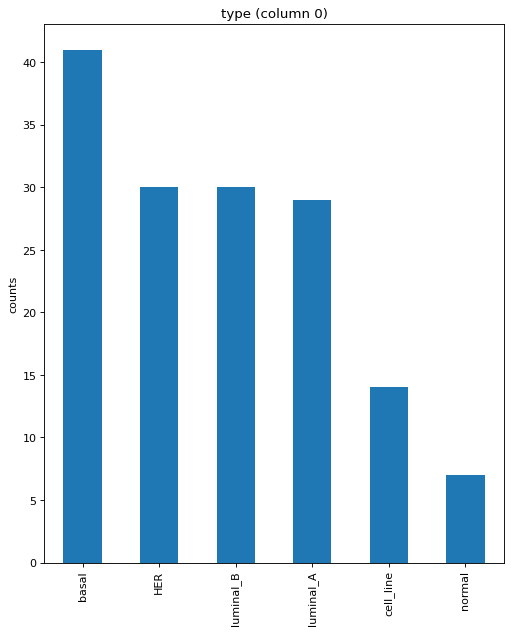

In [42]:
plotPerColumnDistribution(df, 10, 5)


In [38]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()